# code to read data and put into pandas

In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
os.getcwd()

'/Users/geri/Documents/tisem/thesis/data/SPF_individual_forecasts'

In [7]:
#read the excel file with dates for the forecasts
dates = pd.read_excel('SPF_rounds_dates.xlsx')
new_header = dates.iloc[0] 
dates = dates[1:] 
dates.columns = new_header
dates = dates.dropna()

In [8]:
dates['Deadline to reply'].unique()

array([datetime.datetime(1999, 2, 12, 0, 0),
       datetime.datetime(1999, 5, 3, 0, 0),
       datetime.datetime(1999, 8, 6, 0, 0),
       datetime.datetime(1999, 11, 3, 0, 0),
       datetime.datetime(2000, 2, 9, 0, 0),
       datetime.datetime(2000, 5, 5, 0, 0),
       datetime.datetime(2000, 8, 4, 0, 0),
       datetime.datetime(2000, 11, 2, 0, 0),
       datetime.datetime(2001, 2, 1, 0, 0),
       datetime.datetime(2001, 5, 3, 0, 0),
       datetime.datetime(2001, 8, 3, 0, 0),
       datetime.datetime(2001, 10, 29, 0, 0),
       datetime.datetime(2002, 2, 4, 0, 0),
       datetime.datetime(2002, 4, 22, 0, 0),
       datetime.datetime(2002, 7, 22, 0, 0),
       datetime.datetime(2002, 10, 23, 0, 0),
       datetime.datetime(2003, 1, 27, 0, 0),
       datetime.datetime(2003, 4, 24, 0, 0),
       datetime.datetime(2003, 7, 23, 0, 0),
       datetime.datetime(2003, 10, 28, 0, 0),
       datetime.datetime(2004, 1, 28, 0, 0),
       datetime.datetime(2004, 4, 26, 0, 0),
       datetime.

In [10]:
##initiate df for the forecats
##create new dataframe
df = pd.DataFrame(columns=['SurveyDate', 'Source','Current Year', 'One Year Ahead', 'Two Years Ahead', 'Rolling1', 'Rolling2', 'Longer Term'])
df['SurveyDate'] = dates['Deadline to reply'].repeat(128)
for each_date in dates['Deadline to reply'].unique():
    df.loc[df.SurveyDate == each_date,'Source'] = list(range(1,129))
#sources = pd.Series(list(range(1,129))).repeat(len(dates['Deadline to reply'].tolist()))
#sources.index = df.index
#df['Source'] = sources
dqs = {'Q1':'Dec',
      'Q2':'Mar',
      'Q3':'Jun',
      'Q4':'Sep'}
df

SurveyDate  Source Current Year One Year Ahead Two Years Ahead Rolling1  \
3  1999-02-12       1          NaN            NaN             NaN      NaN   
3  1999-02-12       2          NaN            NaN             NaN      NaN   
3  1999-02-12       3          NaN            NaN             NaN      NaN   
3  1999-02-12       4          NaN            NaN             NaN      NaN   
3  1999-02-12       5          NaN            NaN             NaN      NaN   
..        ...     ...          ...            ...             ...      ...   
87 2020-01-13     124          NaN            NaN             NaN      NaN   
87 2020-01-13     125          NaN            NaN             NaN      NaN   
87 2020-01-13     126          NaN            NaN             NaN      NaN   
87 2020-01-13     127          NaN            NaN             NaN      NaN   
87 2020-01-13     128          NaN            NaN             NaN      NaN   

   Rolling2 Longer Term  
3       NaN         NaN  
3       NaN         NaN  
3       NaN         NaN  
3       NaN         NaN  
3       NaN         NaN  
..      ...         ...  
87      NaN         NaN  
87      NaN         NaN  
87      NaN         NaN  
87      NaN         NaN  
87      NaN         NaN  

[10880 rows x 8 columns]

# inflation

In [7]:
for curr_forecast in dates['Deadline to reply'].tolist():
    print(curr_forecast)
    date_curr =  dates.loc[dates['Deadline to reply']==curr_forecast]['SPF round'].to_string().rsplit(' ', 1)[1]
    curr_csv = date_curr+".csv"
    currq = date_curr[-2:]
    df_curr = pd.read_csv(curr_csv)
    #df_curr['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP'].unique()
    index_changes = df_curr.loc[df_curr['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP'].isnull()].index
    df_infl = df_curr.loc[0:index_changes[0]-1,:]
    new_header = df_infl.iloc[0] #grab the first row for the header
    df_infl = df_infl[1:] #take the data less the header row
    df_infl.columns = new_header #set the header row as the df header
    df_infl.dropna(subset=['POINT'])
    df_infl.dropna(axis='columns', how='all')
    df_infl_point = df_infl[['TARGET_PERIOD', 'FCT_SOURCE', 'POINT']]
    #horizons = df_infl_point["TARGET_PERIOD"].unique()
    #if len(horizons)==6:
    #    horizons = horizons[[0, 2, 4]]
    sources_list = np.array(df_infl_point['FCT_SOURCE'].unique().astype(int))
    t1 = str(curr_forecast.year)
    t2 = str(curr_forecast.year+1)
    if (currq=='Q1' or currq=='Q2'):
        t3 = str(curr_forecast.year+4)
    else:
        t3 = str(curr_forecast.year+5)
    if (currq=='Q1'):
        t4 = str(curr_forecast.year)+dqs[currq]
        t5 = str(curr_forecast.year+1)+dqs[currq]
    else:
        t4 = str(curr_forecast.year+1)+dqs[currq]
        t5 = str(curr_forecast.year+2)+dqs[currq]
#sources_list
    for each_source in sources_list:
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Current Year"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t1) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"One Year Ahead"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t2) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        if df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t3)].empty:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Longer Term"] = np.nan
        else:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Longer Term"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t3) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling1"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t4) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        if df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t5)].empty:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling2"] = np.nan
        else:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling2"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t5) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        

1999-02-12 00:00:00
1999-05-03 00:00:00
1999-08-06 00:00:00
1999-11-03 00:00:00
2000-02-09 00:00:00
2000-05-05 00:00:00
2000-08-04 00:00:00
2000-11-02 00:00:00
2001-02-01 00:00:00
2001-05-03 00:00:00
2001-08-03 00:00:00
2001-10-29 00:00:00
2002-02-04 00:00:00
2002-04-22 00:00:00
2002-07-22 00:00:00
2002-10-23 00:00:00
2003-01-27 00:00:00
2003-04-24 00:00:00
2003-07-23 00:00:00
2003-10-28 00:00:00
2004-01-28 00:00:00
2004-04-26 00:00:00
2004-07-26 00:00:00
2004-10-21 00:00:00
2005-01-26 00:00:00
2005-04-22 00:00:00
2005-07-22 00:00:00
2005-10-24 00:00:00
2006-01-23 00:00:00
2006-04-26 00:00:00
2006-07-21 00:00:00
2006-10-20 00:00:00
2007-01-24 00:00:00
2007-04-23 00:00:00
2007-07-18 00:00:00
2007-10-18 00:00:00
2008-01-18 00:00:00
2008-04-18 00:00:00
2008-07-18 00:00:00
2008-10-17 00:00:00
2009-01-20 00:00:00
2009-04-20 00:00:00
2009-07-17 00:00:00
2009-10-19 00:00:00
2010-01-19 00:00:00
2010-04-20 00:00:00
2010-07-19 00:00:00
2010-10-19 00:00:00
2011-01-18 00:00:00
2011-04-19 00:00:00


KeyboardInterrupt: 

In [219]:
import pickle as pk
df_infl = df.copy()
df_infl.to_pickle('infldf.pkl')

# GDP

In [34]:
##initiate df for the forecats
##create new dataframe
df = pd.DataFrame(columns=['SurveyDate', 'Source','Current Year', 'One Year Ahead', 'Two Years Ahead','Rolling1', 'Rolling2', 'Longer Term'])
df['SurveyDate'] = dates['Deadline to reply'].repeat(128)
for each_date in dates['Deadline to reply'].unique():
    df.loc[df.SurveyDate == each_date,'Source'] = list(range(1,129))
#sources = pd.Series(list(range(1,129))).repeat(len(dates['Deadline to reply'].tolist()))
#sources.index = df.index
#df['Source'] = sources
dqs = {'Q1':'Q3',
      'Q2':'Q4',
      'Q3':'Q1',
      'Q4':'Q2'}
df

SurveyDate  Source Current Year One Year Ahead Two Years Ahead Rolling1  \
3  1999-02-12       1          NaN            NaN             NaN      NaN   
3  1999-02-12       2          NaN            NaN             NaN      NaN   
3  1999-02-12       3          NaN            NaN             NaN      NaN   
3  1999-02-12       4          NaN            NaN             NaN      NaN   
3  1999-02-12       5          NaN            NaN             NaN      NaN   
..        ...     ...          ...            ...             ...      ...   
87 2020-01-13     124          NaN            NaN             NaN      NaN   
87 2020-01-13     125          NaN            NaN             NaN      NaN   
87 2020-01-13     126          NaN            NaN             NaN      NaN   
87 2020-01-13     127          NaN            NaN             NaN      NaN   
87 2020-01-13     128          NaN            NaN             NaN      NaN   

   Rolling2 Longer Term  
3       NaN         NaN  
3       NaN         NaN  
3       NaN         NaN  
3       NaN         NaN  
3       NaN         NaN  
..      ...         ...  
87      NaN         NaN  
87      NaN         NaN  
87      NaN         NaN  
87      NaN         NaN  
87      NaN         NaN  

[10880 rows x 8 columns]

In [14]:
curr_forecast = dates['Deadline to reply'].tolist()[18]
curr_forecast

datetime.datetime(2003, 7, 23, 0, 0)

In [18]:
df_curr = pd.read_csv(curr_csv)
    #df_curr['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP'].unique()
index_changes = df_curr.loc[df_curr['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP'].isnull()].index
index_changes

Int64Index([325, 327, 328, 655, 982], dtype='int64')

In [21]:
df_infl = df_curr.loc[index_changes[2]+1:index_changes[3]-1,:]

In [22]:
new_header = df_infl.iloc[1]
df_infl = df_infl[2:]

INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP  Unnamed: 1  \
329  GROWTH EXPECTATIONS; YEAR-ON-YEAR CHANGE IN RE...          NaN   
330                                      TARGET_PERIOD   FCT_SOURCE   
331                                               2003            1   
332                                               2003            2   
333                                               2003            4   
..                                                 ...          ...   
650                                               2008           92   
651                                               2008           93   
652                                               2008           94   
653                                               2008           95   
654                                               2008           96   

    Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
329        NaN        NaN        NaN        NaN        NaN        NaN   
330      POINT       T0_0   F0_0T0_4   F0_5T0_9   F1_0T1_4   F1_5T1_9   
331         .5          4         25         30         25         10   
332         .4        NaN         50         50        NaN        NaN   
333         .8        NaN        NaN        NaN        NaN        NaN   
..         ...        ...        ...        ...        ...        ...   
650        NaN        NaN        NaN        NaN        NaN        NaN   
651        3.1        NaN        NaN        NaN        NaN        NaN   
652        2.2        NaN        NaN        NaN         10         25   
653        2.5          1          2          5         10         15   
654        NaN        NaN        NaN        NaN        NaN        NaN   

    Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13  \
329        NaN        NaN         NaN         NaN         NaN         NaN   
330   F2_0T2_4   F2_5T2_9    F3_0T3_4    F3_5T3_9        F4_0         NaN   
331          3          2           1           0           0         NaN   
332        NaN        NaN         NaN         NaN         NaN         NaN   
333        NaN        NaN         NaN         NaN         NaN         NaN   
..         ...        ...         ...         ...         ...         ...   
650        NaN        NaN         NaN         NaN         NaN         NaN   
651          5         20          75         NaN         NaN         NaN   
652         30         25          10         NaN         NaN         NaN   
653         20         22          14           8           3         NaN   
654        NaN        NaN         NaN         NaN         NaN         NaN   

    Unnamed: 14 Unnamed: 15  
329         NaN         NaN  
330         NaN         NaN  
331         NaN         NaN  
332         NaN         NaN  
333         NaN         NaN  
..          ...         ...  
650         NaN         NaN  
651         NaN         NaN  
652         NaN         NaN  
653         NaN         NaN  
654         NaN         NaN  

[326 rows x 16 columns]

In [35]:
for curr_forecast in dates['Deadline to reply'].tolist():
    print(curr_forecast)
    date_curr =  dates.loc[dates['Deadline to reply']==curr_forecast]['SPF round'].to_string().rsplit(' ', 1)[1]
    curr_csv = date_curr+".csv"
    currq = date_curr[-2:]
    df_curr = pd.read_csv(curr_csv)
    #df_curr['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP'].unique()
    index_changes = df_curr.loc[df_curr['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP'].isnull()].index
    if len(index_changes)==4:
        df_infl = df_curr.loc[index_changes[1]+1:index_changes[2]-1,:]
    else:
        df_infl = df_curr.loc[index_changes[2]+1:index_changes[3]-1,:]
    new_header = df_infl.iloc[1] #grab the first row for the header
    df_infl = df_infl[2:] #take the data less the header row
    df_infl.columns = new_header #set the header row as the df header
    df_infl.dropna(subset=['POINT'])
    df_infl.dropna(axis='columns', how='all')
    df_infl_point = df_infl[['TARGET_PERIOD', 'FCT_SOURCE', 'POINT']]
    #horizons = df_infl_point["TARGET_PERIOD"].unique()
    #if len(horizons)==6:
    #    horizons = horizons[[0, 2, 4]]
    sources_list = np.array(df_infl_point['FCT_SOURCE'].unique().astype(int))
    t1 = str(curr_forecast.year)
    t2 = str(curr_forecast.year+1)
    t6 = str(curr_forecast.year+2)
    if (currq=='Q1' or currq=='Q2'):
        t3 = str(curr_forecast.year+4)
    else:
        t3 = str(curr_forecast.year+5)
    if (currq=='Q1' or currq=='Q2'):
        t4 = str(curr_forecast.year)+dqs[currq]
        t5 = str(curr_forecast.year+1)+dqs[currq]
    else:
        t4 = str(curr_forecast.year+1)+dqs[currq]
        t5 = str(curr_forecast.year+2)+dqs[currq]
#sources_list
    for each_source in sources_list:
        if (curr_csv == '2008Q2.csv') & (each_source ==92 ):
            continue 
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Current Year"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t1) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"One Year Ahead"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t2) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        if len(df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t6)]) > 0:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Two Years Ahead"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t6) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values 
        if df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t3)].empty:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Longer Term"] = np.nan
        else:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Longer Term"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t3) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling1"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t4) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        if df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t5)].empty:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling2"] = np.nan
        else:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling2"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t5) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values

1999-02-12 00:00:00
1999-05-03 00:00:00
1999-08-06 00:00:00
1999-11-03 00:00:00
2000-02-09 00:00:00
2000-05-05 00:00:00
2000-08-04 00:00:00
2000-11-02 00:00:00
2001-02-01 00:00:00
2001-05-03 00:00:00
2001-08-03 00:00:00
2001-10-29 00:00:00
2002-02-04 00:00:00
2002-04-22 00:00:00
2002-07-22 00:00:00
2002-10-23 00:00:00
2003-01-27 00:00:00
2003-04-24 00:00:00
2003-07-23 00:00:00
2003-10-28 00:00:00
2004-01-28 00:00:00
2004-04-26 00:00:00
2004-07-26 00:00:00
2004-10-21 00:00:00
2005-01-26 00:00:00
2005-04-22 00:00:00
2005-07-22 00:00:00
2005-10-24 00:00:00
2006-01-23 00:00:00
2006-04-26 00:00:00
2006-07-21 00:00:00
2006-10-20 00:00:00
2007-01-24 00:00:00
2007-04-23 00:00:00
2007-07-18 00:00:00
2007-10-18 00:00:00
2008-01-18 00:00:00
2008-04-18 00:00:00
2008-07-18 00:00:00
2008-10-17 00:00:00
2009-01-20 00:00:00
2009-04-20 00:00:00
2009-07-17 00:00:00
2009-10-19 00:00:00
2010-01-19 00:00:00
2010-04-20 00:00:00
2010-07-19 00:00:00
2010-10-19 00:00:00
2011-01-18 00:00:00
2011-04-19 00:00:00


In [28]:
curr_forecast = 

True

In [37]:
import pickle as pk
df_gdp = df.copy()
df_gdp.to_pickle('gdpdata.pkl')

In [36]:
df

SurveyDate  Source Current Year One Year Ahead Two Years Ahead Rolling1  \
3  1999-02-12       1            2            2.5             NaN      2.2   
3  1999-02-12       2          2.2            2.4             NaN      2.3   
3  1999-02-12       3          1.9            1.8             NaN      1.8   
3  1999-02-12       4          2.4              3             NaN      2.5   
3  1999-02-12       5          1.9            2.3             NaN        2   
..        ...     ...          ...            ...             ...      ...   
87 2020-01-13     124          NaN            NaN             NaN      NaN   
87 2020-01-13     125          NaN            NaN             NaN      NaN   
87 2020-01-13     126          NaN            NaN             NaN      NaN   
87 2020-01-13     127          1.2            1.4             1.2      1.2   
87 2020-01-13     128          1.2            1.3             1.3      1.3   

   Rolling2 Longer Term  
3       2.5         2.3  
3       2.5         2.5  
3       1.9         2.5  
3       3.1         2.5  
3       2.5         2.6  
..      ...         ...  
87      NaN         NaN  
87      NaN         NaN  
87      NaN         NaN  
87      1.4           1  
87      1.3         1.3  

[10880 rows x 8 columns]

# unemployment

In [205]:
##initiate df for the forecats
##create new dataframe
df = pd.DataFrame(columns=['SurveyDate', 'Source','Current Year', 'One Year Ahead', 'Rolling1', 'Rolling2', 'Longer Term'])
df['SurveyDate'] = dates['Deadline to reply'].repeat(128)
for each_date in dates['Deadline to reply'].unique():
    df.loc[df.SurveyDate == each_date,'Source'] = list(range(1,129))
#sources = pd.Series(list(range(1,129))).repeat(len(dates['Deadline to reply'].tolist()))
#sources.index = df.index
#df['Source'] = sources
dqs = {'Q1':'Nov',
      'Q2':'Feb',
      'Q3':'May',
      'Q4':'Aug'}
df

SurveyDate  Source Current Year One Year Ahead Rolling1 Rolling2  \
3  1999-02-12       1          NaN            NaN      NaN      NaN   
3  1999-02-12       2          NaN            NaN      NaN      NaN   
3  1999-02-12       3          NaN            NaN      NaN      NaN   
3  1999-02-12       4          NaN            NaN      NaN      NaN   
3  1999-02-12       5          NaN            NaN      NaN      NaN   
3  1999-02-12       6          NaN            NaN      NaN      NaN   
3  1999-02-12       7          NaN            NaN      NaN      NaN   
3  1999-02-12       8          NaN            NaN      NaN      NaN   
3  1999-02-12       9          NaN            NaN      NaN      NaN   
3  1999-02-12      10          NaN            NaN      NaN      NaN   
3  1999-02-12      11          NaN            NaN      NaN      NaN   
3  1999-02-12      12          NaN            NaN      NaN      NaN   
3  1999-02-12      13          NaN            NaN      NaN      NaN   
3  1999-02-12      14          NaN            NaN      NaN      NaN   
3  1999-02-12      15          NaN            NaN      NaN      NaN   
3  1999-02-12      16          NaN            NaN      NaN      NaN   
3  1999-02-12      17          NaN            NaN      NaN      NaN   
3  1999-02-12      18          NaN            NaN      NaN      NaN   
3  1999-02-12      19          NaN            NaN      NaN      NaN   
3  1999-02-12      20          NaN            NaN      NaN      NaN   
3  1999-02-12      21          NaN            NaN      NaN      NaN   
3  1999-02-12      22          NaN            NaN      NaN      NaN   
3  1999-02-12      23          NaN            NaN      NaN      NaN   
3  1999-02-12      24          NaN            NaN      NaN      NaN   
3  1999-02-12      25          NaN            NaN      NaN      NaN   
3  1999-02-12      26          NaN            NaN      NaN      NaN   
3  1999-02-12      27          NaN            NaN      NaN      NaN   
3  1999-02-12      28          NaN            NaN      NaN      NaN   
3  1999-02-12      29          NaN            NaN      NaN      NaN   
3  1999-02-12      30          NaN            NaN      NaN      NaN   
..        ...     ...          ...            ...      ...      ...   
87 2020-01-13      99          NaN            NaN      NaN      NaN   
87 2020-01-13     100          NaN            NaN      NaN      NaN   
87 2020-01-13     101          NaN            NaN      NaN      NaN   
87 2020-01-13     102          NaN            NaN      NaN      NaN   
87 2020-01-13     103          NaN            NaN      NaN      NaN   
87 2020-01-13     104          NaN            NaN      NaN      NaN   
87 2020-01-13     105          NaN            NaN      NaN      NaN   
87 2020-01-13     106          NaN            NaN      NaN      NaN   
87 2020-01-13     107          NaN            NaN      NaN      NaN   
87 2020-01-13     108          NaN            NaN      NaN      NaN   
87 2020-01-13     109          NaN            NaN      NaN      NaN   
87 2020-01-13     110          NaN            NaN      NaN      NaN   
87 2020-01-13     111          NaN            NaN      NaN      NaN   
87 2020-01-13     112          NaN            NaN      NaN      NaN   
87 2020-01-13     113          NaN            NaN      NaN      NaN   
87 2020-01-13     114          NaN            NaN      NaN      NaN   
87 2020-01-13     115          NaN            NaN      NaN      NaN   
87 2020-01-13     116          NaN            NaN      NaN      NaN   
87 2020-01-13     117          NaN            NaN      NaN      NaN   
87 2020-01-13     118          NaN            NaN      NaN      NaN   
87 2020-01-13     119          NaN            NaN      NaN      NaN   
87 2020-01-13     120          NaN            NaN      NaN      NaN   
87 2020-01-13     121          NaN            NaN      NaN      NaN   
87 2020-01-13     122          NaN            NaN      NaN      NaN   
87 2020-01-13     123      

In [209]:
for curr_forecast in dates['Deadline to reply'].tolist():
    print(curr_forecast)
    date_curr =  dates.loc[dates['Deadline to reply']==curr_forecast]['SPF round'].to_string().rsplit(' ', 1)[1]
    curr_csv = date_curr+".csv"
    currq = date_curr[-2:]
    qs = dqs[currq]
    if curr_csv=='2000Q1.csv':
        qs = 'Dec'
    df_curr = pd.read_csv(curr_csv)
    #df_curr['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP'].unique()
    index_changes = df_curr.loc[df_curr['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP'].isnull()].index
    if len(index_changes)==4:
        df_infl = df_curr.loc[index_changes[2]+1:index_changes[3]-1,:]
    else:
        df_infl = df_curr.loc[index_changes[3]+1:index_changes[4]-1,:]
    new_header = df_infl.iloc[1] #grab the first row for the header
    df_infl = df_infl[2:] #take the data less the header row
    df_infl.columns = new_header #set the header row as the df header
    df_infl.dropna(subset=['POINT'])
    df_infl.dropna(axis='columns', how='all')
    df_infl_point = df_infl[['TARGET_PERIOD', 'FCT_SOURCE', 'POINT']]
    #horizons = df_infl_point["TARGET_PERIOD"].unique()
    #if len(horizons)==6:
    #    horizons = horizons[[0, 2, 4]]
    sources_list = np.array(df_infl_point['FCT_SOURCE'].unique().astype(int))
    t1 = str(curr_forecast.year)
    t2 = str(curr_forecast.year+1)
    if (currq=='Q1' or currq=='Q2'):
        t3 = str(curr_forecast.year+4)
    else:
        t3 = str(curr_forecast.year+5)
    if (currq=='Q1'):
        t4 = str(curr_forecast.year)+qs
        t5 = str(curr_forecast.year+1)+qs
    else:
        t4 = str(curr_forecast.year+1)+qs
        t5 = str(curr_forecast.year+2)+qs
#sources_list
    for each_source in sources_list:
        if (curr_csv == '2008Q2.csv') & (each_source ==92 ):
            continue 
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Current Year"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t1) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"One Year Ahead"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t2) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        if df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t3)].empty:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Longer Term"] = np.nan
        else:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Longer Term"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t3) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling1"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t4) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        if df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t5)].empty:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling2"] = np.nan
        else:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling2"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t5) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values

1999-02-12 00:00:00
1999-05-03 00:00:00
1999-08-06 00:00:00
1999-11-03 00:00:00
2000-02-09 00:00:00
2000-05-05 00:00:00
2000-08-04 00:00:00
2000-11-02 00:00:00
2001-02-01 00:00:00
2001-05-03 00:00:00
2001-08-03 00:00:00
2001-10-29 00:00:00
2002-02-04 00:00:00
2002-04-22 00:00:00
2002-07-22 00:00:00
2002-10-23 00:00:00
2003-01-27 00:00:00
2003-04-24 00:00:00
2003-07-23 00:00:00
2003-10-28 00:00:00
2004-01-28 00:00:00
2004-04-26 00:00:00
2004-07-26 00:00:00
2004-10-21 00:00:00
2005-01-26 00:00:00
2005-04-22 00:00:00
2005-07-22 00:00:00
2005-10-24 00:00:00
2006-01-23 00:00:00
2006-04-26 00:00:00
2006-07-21 00:00:00
2006-10-20 00:00:00
2007-01-24 00:00:00
2007-04-23 00:00:00
2007-07-18 00:00:00
2007-10-18 00:00:00
2008-01-18 00:00:00
2008-04-18 00:00:00
2008-07-18 00:00:00
2008-10-17 00:00:00
2009-01-20 00:00:00
2009-04-20 00:00:00
2009-07-17 00:00:00
2009-10-19 00:00:00
2010-01-19 00:00:00
2010-04-20 00:00:00
2010-07-19 00:00:00
2010-10-19 00:00:00
2011-01-18 00:00:00
2011-04-19 00:00:00


In [210]:
df

SurveyDate  Source  Current Year One Year Ahead      Rolling1  \
3  1999-02-12       1          10.2             10          10.2   
3  1999-02-12       2            10            9.8            10   
3  1999-02-12       3          10.7           10.8          10.9   
3  1999-02-12       4            11           10.6            11   
3  1999-02-12       5           9.9            9.8           9.9   
3  1999-02-12       6          10.6           10.5          10.6   
3  1999-02-12       7          10.9           10.7          10.8   
3  1999-02-12       8           NaN            NaN           NaN   
3  1999-02-12       9          10.9             11          10.9   
3  1999-02-12      10          10.9           10.7          11.1   
3  1999-02-12      11          10.6           10.3          10.6   
3  1999-02-12      12           NaN            NaN           NaN   
3  1999-02-12      13           NaN            NaN           NaN   
3  1999-02-12      14          10.5           10.3          10.3   
3  1999-02-12      15           NaN            NaN           NaN   
3  1999-02-12      16          10.7           10.2          10.6   
3  1999-02-12      17          10.4             10          10.3   
3  1999-02-12      18            11           11.3          11.1   
3  1999-02-12      19          11.5           11.5          11.6   
3  1999-02-12      20          10.6           10.4          10.4   
3  1999-02-12      21           NaN            NaN           NaN   
3  1999-02-12      22           NaN            NaN           NaN   
3  1999-02-12      23          10.5             10          10.4   
3  1999-02-12      24          10.5           10.3          10.5   
3  1999-02-12      25           NaN            NaN           NaN   
3  1999-02-12      26          10.7           10.5          10.6   
3  1999-02-12      27           NaN            NaN           NaN   
3  1999-02-12      28          10.9             11          10.8   
3  1999-02-12      29          10.8           10.5            11   
3  1999-02-12      30           NaN            NaN           NaN   
..        ...     ...           ...            ...           ...   
87 2020-01-13      99           7.4            7.3           7.4   
87 2020-01-13     100           NaN            NaN           NaN   
87 2020-01-13     101           7.4            7.4           7.4   
87 2020-01-13     102           7.5            7.7           7.7   
87 2020-01-13     103           7.5            7.4           NaN   
87 2020-01-13     104           NaN            NaN           NaN   
87 2020-01-13     105           7.5            7.5           7.5   
87 2020-01-13     106           NaN            NaN           NaN   
87 2020-01-13     107  7.5362453316   7.4550120643  7.5361404758   
87 2020-01-13     108   7.765698469   7.7538221507  7.7758090027   
87 2020-01-13     109           NaN            NaN           NaN   
87 2020-01-13     110           7.5            7.3           7.3   
87 2020-01-13     111           NaN            NaN           NaN   
87 2020-01-13     112           7.3            7.4           7.2   
87 2020-01-13     113           NaN            NaN           NaN   
87 2020-01-13     114           7.7            7.8           7.7   
87 2020-01-13     115           7.8            7.9           NaN   
87 2020-01-13     116           7.5            7.3           7.4   
87 2020-01-13     117           7.3              7           7.3   
87 2020-01-13     118           7.4            7.1           7.3   
87 2020-01-13     119           7.4            7.4           7.4   
87 2020-01-13     120           NaN            NaN           NaN   
87 2020-01-13     121           7.4           7.13           7.3   
87 2020-01-13     122           NaN            NaN           NaN   
87 2020-01-13     123           NaN            NaN           NaN   
87 2020-01-13     124           NaN            NaN           NaN   
87 2020-01-13     125           NaN            NaN         

In [211]:
import pickle as pk
df_un = df.copy()
df_un.to_pickle('undata.pkl')

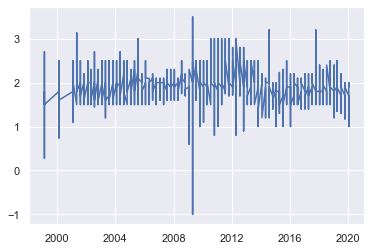

In [224]:
plt.plot(df['Longer Term'].dropna().astype(float))

# plot forecasts in time

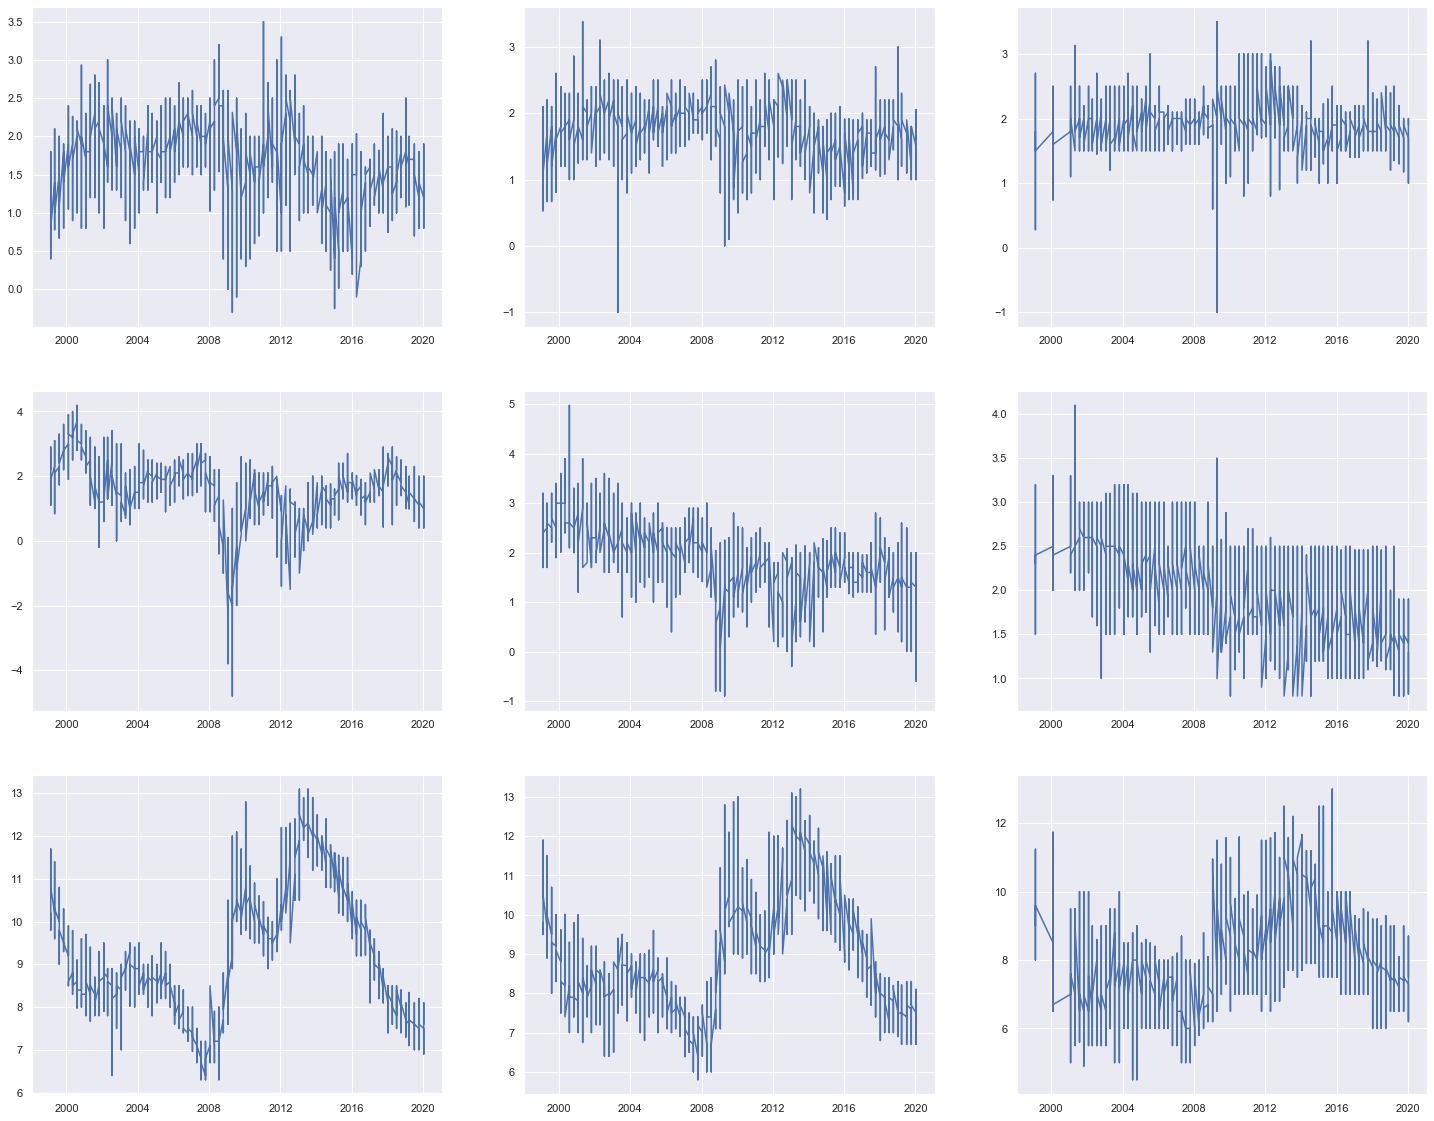

In [226]:
sns.set()
fig, axs = plt.subplots(3, 3, figsize=(25, 20))
axs[0,0].plot(df['Rolling1'].dropna().astype(float))
axs[0,1].plot(df['Rolling2'].dropna().astype(float))
axs[0,2].plot(df['Longer Term'].dropna().astype(float))
axs[1,0].plot(df_gdp['Rolling1'].dropna().astype(float))
axs[1,1].plot(df_gdp['Rolling2'].dropna().astype(float))
axs[1,2].plot(df_gdp['Longer Term'].dropna().astype(float))
axs[2,0].plot(df_un['Rolling1'].dropna().astype(float))
axs[2,1].plot(df_un['Rolling2'].dropna().astype(float))
axs[2,2].plot(df_un['Longer Term'].dropna().astype(float))

In [220]:
df_un = pd.read_pickle('undata.pkl')
df_gdp = pd.read_pickle('gdpdata.pkl')
df = pd.read_pickle('infldf.pkl')

In [221]:
df.index = df['SurveyDate']
df_gdp.index = df['SurveyDate']
df_un.index = df['SurveyDate']
#df.to_pickle('infldf.pkl')

# forecasts histograms

(array([ 11., 109., 685., 698., 801., 481., 203.,  68.,  16.,   5.]),
 array([ 4.5 ,  5.35,  6.2 ,  7.05,  7.9 ,  8.75,  9.6 , 10.45, 11.3 ,
        12.15, 13.  ]),
 <a list of 10 Patch objects>)

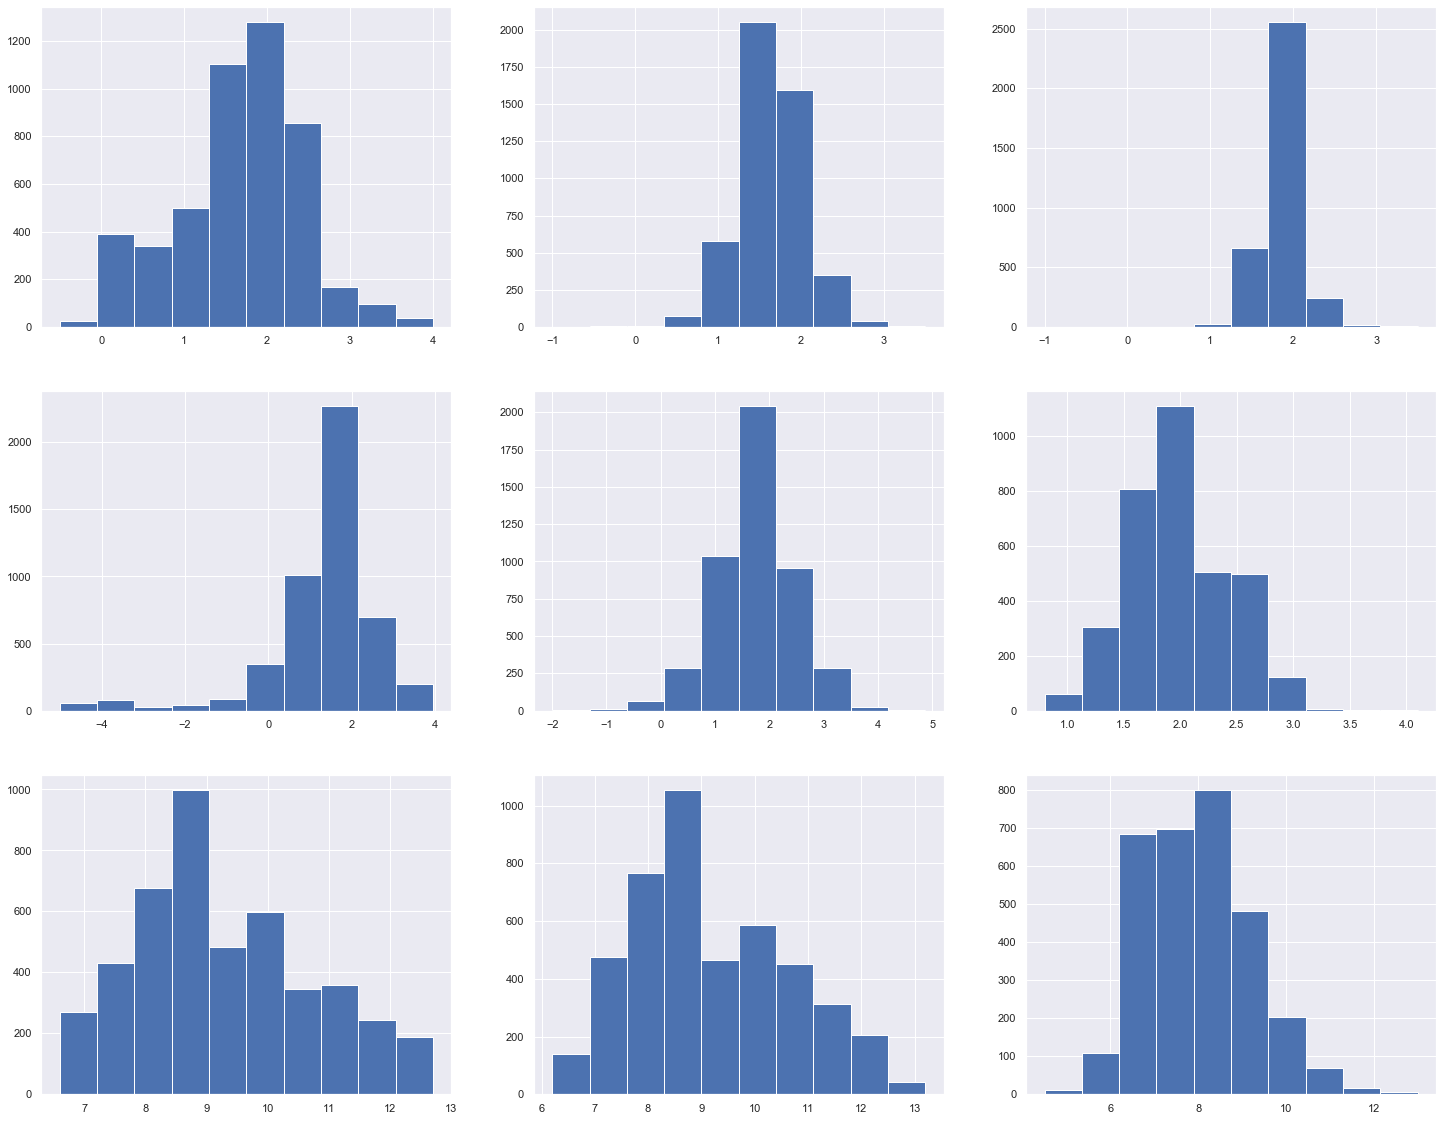

In [227]:
fig, axs = plt.subplots(3, 3, figsize=(25, 20))
axs[0,0].hist(df['Current Year'].dropna().astype(float))
axs[0,1].hist(df['One Year Ahead'].dropna().astype(float))
axs[0,2].hist(df['Longer Term'].dropna().astype(float))
axs[1,0].hist(df_gdp['Current Year'].dropna().astype(float))
axs[1,1].hist(df_gdp['One Year Ahead'].dropna().astype(float))
axs[1,2].hist(df_gdp['Longer Term'].dropna().astype(float))
axs[2,0].hist(df_un['Current Year'].dropna().astype(float))
axs[2,1].hist(df_un['One Year Ahead'].dropna().astype(float))
axs[2,2].hist(df_un['Longer Term'].dropna().astype(float))

In [228]:
df['Current Year'] = df['Current Year'].astype(float)
df['One Year Ahead'] = df['One Year Ahead'].astype(float)
df['Longer Term'] = df['Longer Term'].astype(float)

In [229]:
df['diff'] = df.groupby('Source')['Current Year'].diff().fillna(0)

ValueError: 

In [ ]:
df1 = df.sort_values(by=['Source', 'SurveyDate'])

In [ ]:
df1['CurrentYearDiff'] = df1['Current Year'].diff()
df1['OneYearDiff'] = df1['One Year Ahead'].diff()
df1['LongTermDiff'] = df1['Longer Term'].diff()

In [ ]:
df1 = df1.sort_values(by=['SurveyDate'])

In [230]:
df1 = df1.dropna()

NameError: name 'df1' is not defined

In [28]:
df1.index = df1['SurveyDate']

# One period differences

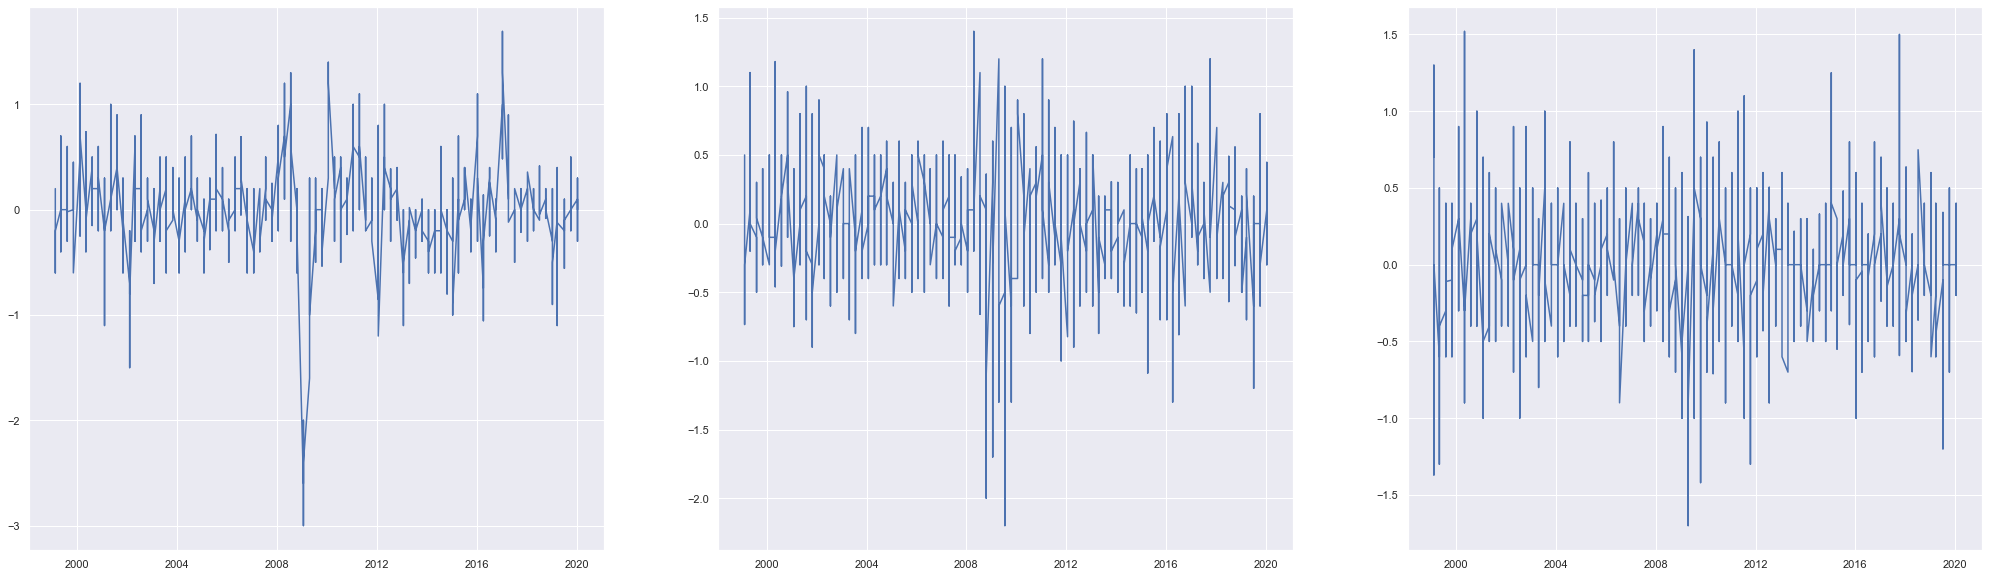

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(35, 10))
axs[0].plot(df1['CurrentYearDiff'].dropna().astype(float))
axs[1].plot(df1['OneYearDiff'].dropna().astype(float))
axs[2].plot(df1['LongTermDiff'].dropna().astype(float))
#axs[1,0].hist(df_gdp['Current Year'].dropna().astype(float))
#axs[1,1].hist(df_gdp['One Year Ahead'].dropna().astype(float))
#axs[1,2].hist(df_gdp['Longer Term'].dropna().astype(float))
#axs[2,0].hist(df_un['Current Year'].dropna().astype(float))
#axs[2,1].hist(df_un['One Year Ahead'].dropna().astype(float))
#axs[2,2].hist(df_un['Longer Term'].dropna().astype(float))

In [30]:
df1means = df1.groupby('SurveyDate')[['CurrentYearDiff','OneYearDiff', 'LongTermDiff']].mean()
df1means.index = df1['SurveyDate'].unique()

/Users/geri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'SurveyDate' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


# Means of differences

In [272]:
df1means

CurrentYearDiff   OneYearDiff  LongTermDiff
1999-02-12    -2.325581e-03 -3.023256e-02     -0.023256
1999-05-03     3.870968e-03 -1.806452e-02     -0.018710
1999-08-06     2.896234e-17  1.521739e-02     -0.008696
1999-11-03    -2.076923e-02  4.153846e-02      0.038462
2000-02-09    -1.960000e-02 -1.360000e-01     -0.122400
2000-05-05    -2.000000e-02  1.933333e-02      0.005333
2000-08-04     9.916667e-02  6.125000e-02      0.042500
2000-11-02     4.883721e-03 -3.325581e-02     -0.044884
2001-02-01    -9.251859e-18 -8.333333e-03     -0.012083
2001-05-03     1.315789e-03 -5.000000e-02     -0.031579
2001-08-03     2.727273e-02 -6.363636e-02     -0.009091
2001-10-29    -1.818182e-02 -2.272727e-02      0.031818
2002-02-04    -3.181818e-02  5.454545e-02      0.077273
2002-04-22    -6.250000e-02 -9.166667e-02     -0.004167
2002-07-22     2.380952e-02 -7.142857e-03      0.019048
2002-10-23    -9.049872e-03 -4.000000e-02      0.135000
2003-01-27    -3.456813e-02 -1.809558e-02     -0.032128
2003-04-24    -1.250000e-02 -5.416667e-02     -0.033333
2003-07-23     6.470588e-02  2.941176e-02      0.000000
2003-10-28     2.925887e-03 -6.421318e-02     -0.034320
2004-01-28     1.923077e-02 -6.923077e-02     -0.050000
2004-04-26    -3.030303e-03 -3.636364e-02     -0.039394
2004-07-26     2.222222e-02 -1.233581e-17     -0.005556
2004-10-21     2.093866e-02  2.111337e-02      0.025000
2005-01-26    -8.051634e-03 -5.262338e-03     -0.021984
2005-04-22     1.538462e-02  0.000000e+00     -0.007692
2005-07-22     6.666667e-03 -8.666667e-02     -0.053333
2005-10-24    -3.529412e-02 -1.000000e-01     -0.017647
2006-01-23     5.000000e-02  3.611990e-02      0.076923
2006-04-26    -5.555556e-03 -3.703704e-02     -0.048148
...                     ...           ...           ...
2012-10-22    -3.907722e-02 -8.897570e-02     -0.058887
2013-01-22     9.711704e-02  7.651524e-02      0.055756
2013-04-19     4.501652e-02  1.294398e-01      0.099834
2013-07-19    -3.772575e-02  1.533077e-02     -0.006826
2013-10-22    -1.111111e-02 -1.233581e-17      0.002778
2014-01-24    -7.465795e-02 -7.972658e-02     -0.139161
2014-04-25    -1.469444e-02 -1.388889e-03      0.020278
2014-07-24    -4.545455e-02 -5.454545e-02     -0.081818
2014-10-23     6.827001e-03  9.659491e-02      0.127697
2015-01-13     1.454404e-02  5.840425e-02      0.089168
2015-04-07     6.752068e-03  5.365909e-02      0.044795
2015-07-06     2.429918e-02  2.406780e-02     -0.004470
2015-10-06     3.571429e-02  7.144286e-02      0.001886
2016-01-11    -6.268750e-02 -1.511562e-01     -0.076156
2016-04-06     8.283040e-02 -3.252000e-02     -0.107304
2016-07-06    -8.388808e-03 -8.673700e-02     -0.106466
2016-10-06    -2.727273e-02  1.084646e-01     -0.028134
2017-01-10     2.898037e-03 -3.099819e-02      0.021371
2017-04-07     1.185877e-02  9.727679e-03     -0.088439
2017-07-07     6.916679e-02 -1.172948e-01     -0.014420
2017-10-06     2.597178e-02  5.537308e-02      0.060962
2018-01-11    -1.181782e-02  4.027567e-02      0.041866
2018-04-10     3.390092e-02  4.825557e-02     -0.029655
2018-07-06    -9.059524e-03 -1.764730e-02      0.179906
2018-10-05    -1.346482e-02 -8.000856e-02     -0.093664
2019-01-11     5.304541e-02  9.687019e-02      0.161238
2019-03-22    -5.533827e-02 -3.192514e-02     -0.027683
2019-07-05    -1.341220e-02 -7.888303e-02     -0.101344
2019-10-07    -2.172639e-02 -7.159287e-02     -0.061188
2020-01-13    -3.132716e-02  2.662785e-02      0.102512

[85 rows x 3 columns]

In [231]:
plt.plot(df1means)

NameError: name 'df1means' is not defined

In [8]:
%history -g

 2/1: import numpy as np
 2/2:
import pandas as pd
import statsmodels as sm
import os
from statsmodels.tsa.api import VAR, DynamicVAR, AR, ARMA, ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.base.datetools import dates_from_str
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.multivariate.pca import PCA
import plotly
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
 2/3: import sys
 2/4: !{sys.executable} -m pip install plotly
 3/1: runfile('/Users/geri/.spyder-py3/temp.py', wdir='/Users/geri/.spyder-py3')
 3/2: import pandas as pd
 3/3: import numpy as np
 3/4: import statsmodels as sm
 3/5: import os
 3/6: from statsmodels.tsa.api import VAR, DynamicVAR, AR, ARMA, ARIMA
 3/7: from statsmodels.tsa.vector_ar.var_model import VAR
 3/8: from statsmodels.tsa.holtwinters import ExponentialSmoothing
 3/9: from statsmodels.tsa.base.datetools

19/177: article.publish_date
19/178: article.nlp()
19/179: article.keywords
19/180:
mydivs_pages = soup.findAll("div", {"class": "center_them"})
urls_pages = []
for div in mydivs_pages: 
    urls_pages.append(div.a['href'])
19/181:
mydivs_pages = soup.findAll("div", {"class": "pagination-wrap left w100 center"})
urls_pages = []
for div in mydivs_pages: 
    urls_pages.append(div.a['href'])
19/182: mydivs_pages = soup.findAll("div", {"class": "center_them"})
19/183:
urls_pages = []
for div in mydivs_pages: 
    urls_pages.append(div.a['href']
19/184: mydivs_pages = soup.findAll("div", {"class": "pagination-wrap left w100 center"})
19/185: mydivs_pages
19/186: mydivs_pages = soup.findAll("a", {"class": "pages"})
19/187: urls_pages = []
19/188: for div in mydivs_pages:
19/189:
for div in mydivs_pages: 
    urls_pages.append(div.a['href'])
19/190:
urls_pages = []
for div in mydivs_pages: 
    urls_pages.append(div['href'])
19/191: mydivs_pages
19/192: mydivs_pages[0]
19/193: mydivs_pages[0

def piSim(runs):
    uDist = stats.uniform(-1,2) #drawing the uniform [-1,1] distribution
    x = uDist.rvs(runs)
    y = uDist.rvs(runs)
    results = x**2+y**2 <=1
    results = 4*results
    return results


n = 100000000
sim = piSim(n)
25/50: np.mean(sim)
25/51: math.radians(100)
25/52: math.radians(180)
25/53: math.radians(180)-np.mean(sim)
25/54:
from statistics import mean
from scipy import stats
import numpy as np
import math

def piSim(runs):
    uDist = stats.uniform(-1,2) #drawing the uniform [-1,1] distribution
    x = uDist.rvs(runs)
    y = uDist.rvs(runs)
    results = x**2+y**2 <=1
    results = 4*results
    return results


n = 100000000
sim = piSim(n)
25/55: m = np.mean(sim)/4
25/56: print(m)
25/57: print(m)*4
25/58: print(m*4)
25/59:
from statistics import mean
from scipy import stats
import numpy as np
import math
25/60:
def sampleBinom ( nrSamples , n , p ):
    probs = [ stats.binom (n , k ) * p ** k * (1 - p )**( n - k) for k in range ( n + 1)]
    u = stats . u

31/39: dfp = pd.read_csv('12_Industry_Portfolios.csv', skiprows=11)
31/40: last_row = dfp[dfp['Unnamed: 0']== '201907'].index.values.astype(int)[0]
31/41: dfp = dfp.drop(dfp[dfp.index > last_row].index)
31/42: dfp['Unnamed: 0'] = datetime.strptime(dfp['Unnamed: 0'], '%Y%m')
31/43: dfp['Unnamed: 0'] = pd.to_datetime(dfp['Unnamed: 0'] , format='%Y%m')
31/44: dfp.index = pd.DatetimeIndex(dfp['Unnamed: 0'])
31/45: dfp = dfp.drop(dfp['Unnamed: 0'])
31/46:
dfp = pd.read_csv('12_Industry_Portfolios.csv', skiprows=11)
last_row = dfp[dfp['Unnamed: 0']== '201907'].index.values.astype(int)[0]
dfp = dfp.drop(dfp[dfp.index > last_row].index)
dfp['Unnamed: 0'] = pd.to_datetime(dfp['Unnamed: 0'] , format='%Y%m')
dfp.index = pd.DatetimeIndex(dfp['Unnamed: 0'])
31/47: dfp.drop(dfp['Unnamed: 0'])
31/48: dfp.drop(dfp['Unnamed: 0'])
31/49: dfp.drop(columns=dfp['Unnamed: 0'])
31/50: dfp = dfp[['NoDur', 'Manuf', 'Enrgy', 'Shops', 'Hlth']]
31/51: dfp.colnames
31/52: dfp.colnames()
31/53: list(dfp.columns.val

38/18: expected_revenue_sorted = -np.sort(-exp_ratio)
38/19: expected_revenue_sorted = -np.argsort(-exp_ratio
38/20: expected_revenue_sorted = -np.argsort(-exp_ratio)
38/21: expected_revenue_sorted = -np.argsort(exp_ratio)
38/22: expected_revenue_sorted = np.argsort(exp_ratio)
38/23: epxected_weight = ((1-pie)*dl+pie*dh)
38/24: expected_revenue = epxected_weight*r
38/25: exp_ratio = expected_revenue/epxected_weight
38/26: epxected_weight = ((1-pie)*dl+pie*dh)
38/27: expected_revenue = epxected_weight*r
38/28: exp_ratio = expected_revenue/epxected_weight
38/29: expected_revenue_sorted = np.argsort(exp_ratio)
39/1:
import numpy as np
#fixed parameters
#group number g
g = 4
#risk parameter alpha in the two scenarios
r_ev = 0
r_cvar = 0.95
#unit excess weight penalty (p)
p=60+g/10
#capacity (K)
K=400+4*g

d_l = np.zeros(shape=(10,10))
d_h = np.zeros(shape=(10,10))
pie = np.zeros(shape=(10,10))    
r_i = np.zeros(shape=(10,10)) 
for j in range(0,10):    
    #generates the variables for eac

44/86: model = sm.OLS(Y,X).fit()
44/87: print(model.summary())
43/18:
#reading the data
import pandas as pd
import os
import statsmodels.api as sm

path="/Users/geri/Documents/tisem/microeconometrics/HW2/"
os.chdir(path)
cath = pd.read_stata('cath.dta')
cath.index = cath['uqid']

#set some variable groups
demographics = ['age80', 'age90', 'fem70', 'fem80', 'fem90', 'black70', 'black80', 'black90', 'femblack70', 'femblack80', 'femblack90', 'msa']
hosp_char = ['serv2', 'serv3', 'vol2', 'vol3', 'vol4']
health_info = ['charl2', 'charl3', 'killip2', 'killip3']
43/19:
x_vars = demographics[:]
x_vars.insert(0, 'ycath90days')
x = cath[x_vars]
Y = cath['xdied1yr']
X = sm.add_constant(x)

model = sm.OLS(Y,X).fit()
print(model.summary())
43/20:
x_vars = demographics+hosp_char
x_vars.insert(0, 'ycath90days')
x = cath[x_vars]
Y = cath['xdied1yr']
X = sm.add_constant(x)

model = sm.OLS(Y,X).fit()
print(model.summary())
43/21:
x_vars = demographics+hosp_char+health_info
x_vars.insert(0, 'ycath90days'

52/7:
x_vars = [s + 'cath' for s in demographics]
x_vars.insert(0, 'ycath90days')
x_vars = x_vars+demographics
x = cath[x_vars]
Y = cath['xdied1yr']
X = sm.add_constant(x)

model = sm.OLS(Y,X).fit()
params_dem = model.params
print(model.summary())
52/8:
x_vars_aggr = demographics+hosp_char
x_vars = [s + 'cath' for s in x_vars_aggr]
x_vars.insert(0, 'ycath90days')
#we add the original covariates as well, not just the inter terms, right?
x_vars = x_vars+demographics+hosp_char
x = cath[x_vars]
Y = cath['xdied1yr']
X = sm.add_constant(x)

model = sm.OLS(Y,X).fit()
params_dem_hosp = model.params
print(model.summary())
52/9:
x_vars_aggr = demographics+hosp_char+health_info
x_vars = [s + 'cath' for s in x_vars_aggr]
x_vars.insert(0, 'ycath90days')
#we add the original covariates as well, not just the inter terms, right?
x_vars = x_vars+demographics+hosp_char+health_info
x = cath[x_vars]
Y = cath['xdied1yr']
X = sm.add_constant(x)

model = sm.OLS(Y,X).fit()
params_dem_hosp_health = model.param

59/29: print(res)
55/60:
df = pd.concat([df_dfp, df_rf], axis=1).dropna()
#pick our selected five industry portofolios
ind = ['NoDur', 'Manuf', 'Enrgy', 'Shops', 'Hlth ']
#estimate the CAPM for each one
for each_ind in ind:
    #calculate the excess return on the i-th portfolio
    y = (df[each_ind]-df['RF'])
    #calculate the excess market return
    x_capm = df['Mkt-RF']
    #add Jenkin's alpha
    x1 = sm.add_constant(x_capm)
    #define the OLS regression using HAC errors
    model = sm.OLS(y,x1).fit(cov_type='HAC',cov_kwds={'maxlags':12})
    print(model.summary())
df_params
55/61:
df = pd.concat([df_dfp, df_ffm], axis=1).dropna()
#pick our selected five industry portofolios
ind = ['NoDur', 'Manuf', 'Enrgy', 'Shops', 'Hlth ']
#estimate the CAPM for each one
for each_ind in ind:
    #calculate the excess return on the i-th portfolio
    y = df[each_ind]-df['RF']
    #calculate the excess market return
    x_ff = pd.concat([df['Mkt-RF'], df['SMB'], df['HML'], df['RMW'], df['CMA']],

%matplotlib inline
73/55:
#path to data
path="/Users/geri/Documents/tisem/labs/"
os.chdir(path)
#read data without headers
df_test = pd.read_csv('mnist_test.csv', header=None)
df_train = pd.read_csv('mnist_train.csv', header=None)
df_train.rename(columns={ df_train.columns[0]: "Digit" }, inplace = True)
df_test.rename(columns={ df_test.columns[0]: "Digit" }, inplace = True)
X_train = df_train.drop('Digit', axis=1).values
X_test = df_test.drop('Digit', axis=1).values
73/56: input_img= Input(shape=(784,))
73/57:
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)
autoencoder=Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.summary()
73/58: encoder.summary()
73/59: autoencoder.compile(opti

90/6:
import glob
#path to data
path="/Users/geri/Documents/tisem/labs/"
os.chdir(path)

def most_frequent(List): 
    return max(set(List), key = List.count)

model_names = glob.glob("*.joblib")
x_test = x.loc[0,:]

def maj_wins_all(X):
    predictions = []
    for models in model_names:
        mod = load(models)
        curr_pred = mod.predict(X.values.reshape(1,-1))[0]    
        predictions.append(curr_pred)
    return most_frequent(predictions)

df_pred = pd.DataFrame(columns=['prediction','actual'])
df_test_data = df_test.drop('Digit', axis=1)
df_actuals = df_test['Digit']
for i in range(0, 1000):
    df_pred.loc[i, 'prediction'] = maj_wins_all(df_test_data.loc[i, :])
    df_pred.loc[i, 'actual'] = df_actuals[i]        

print(classification_report(df_pred['actual'], df_pred['prediction']))
90/7:
import glob
#path to data
path="/Users/geri/Documents/tisem/labs/"
os.chdir(path)

def most_frequent(List): 
    return max(set(List), key = List.count)

model_names = glob.glob("*.job

95/42: digits = [i, dig_main]
95/43: df_train_b = df_tr['Digit'].isin(digits)
95/44: df_tr_new = df_tr[df_train_b].sample(3000, random_state=123)
95/45: x = df_tr_new.drop('Digit', axis=1)
95/46: y = df_tr_new['Digit']
95/47:
path="/Users/geri/Documents/tisem/labs/SMVs/"
os.chdir(path)
95/48:
start_time = time.process_time()
for dig_main in range(0, 10):
    for i in range(0, 10):
        print('start', i)
        if (i<dig_main or i==dig_main):
            continue
        digits = [i, dig_main]
        df_train_b = df_tr['Digit'].isin(digits)
        df_tr_new = df_tr[df_train_b].sample(3000, random_state=123)
        x = df_tr_new.drop('Digit', axis=1)
        y = df_tr_new['Digit']
        #set options for optimal parameters for the grid search
        Cs = [1*10**(4), 1*10**(2), 1*10**(1), 1*10**(-2)] 
        #we already know the linear does well, so we are leaving small numbers for gamma?
        gammas = [1, 1*10**(-1), 1*10**(-2), 1*10**(-4), 1*10**(-8)]
        params = svc_p

100/33:
import time
start_time = time.process_time()

for dig_main in range(0, 10):
    for i in range(0, 10):
        print('start', i)
        if (i<dig_main or i==dig_main):
            continue
        digits = [i, dig_main]
        df_train_b = df_train['Digit'].isin(digits)
        trainData = df_train[df_train_b].drop('Digit', axis=1)
        trainTarget = df_train[df_train_b]['Digit']
        X = sp.transform(trainData)
        Y = trainTarget[df_train_b]   
        model = SVC(kernel='rbf', gamma='scale')
        model.fit(X, Y)
        model_name = str(i)+str(dig_main)+'svm_sp.joblib'
        dump(model, model_name) 
        print('end', i)        


elapsed_time_sp = time.process_time() - start_time
94/109: plt.plot(autoencoder.history['acc'])
94/110:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
94/111: autoencoder.history
94/112: autoencoder.history['acc']
94/113: autoencoder.history.history['acc']
94/114: autoencoder.history.history
94/115: autoenc

104/71:
fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(weights[0][39].reshape(28, 28))
axs[0, 1].imshow(weights[0][34].reshape(28, 28))
axs[0, 2].imshow(weights[0][25].reshape(28, 28))
axs[1, 0].imshow(weights[0][27].reshape(28, 28))
axs[1, 1].imshow(weights[0][7].reshape(28, 28))
axs[1, 2].imshow(weights[0][35].reshape(28, 28))
104/72:
fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(weights[0][40].reshape(28, 28))
axs[0, 1].imshow(weights[0][34].reshape(28, 28))
axs[0, 2].imshow(weights[0][25].reshape(28, 28))
axs[1, 0].imshow(weights[0][27].reshape(28, 28))
axs[1, 1].imshow(weights[0][7].reshape(28, 28))
axs[1, 2].imshow(weights[0][35].reshape(28, 28))
104/73:
fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(weights[0][41].reshape(28, 28))
axs[0, 1].imshow(weights[0][34].reshape(28, 28))
axs[0, 2].imshow(weights[0][25].reshape(28, 28))
axs[1, 0].imshow(weights[0][27].reshape(28, 28))
axs[1, 1].imshow(weights[0][7].reshape(28, 28))
axs[1, 2].imshow(weights[0][35].reshape(28, 28))
104/74:

opt_df = pd.DataFrame.from_dict(decision_vars, orient="index", 
                                columns = ["variable_object"])
# get the optimal values
opt_df["solution_value"] = opt_df["variable_object"].apply(lambda item: item.X)
opt_df.drop(columns=["variable_object"], inplace=True)
117/149: df_cvar = opt_df['solution_value']
117/150:
for i in range(1, 10):
    instance = 1
    sc = np.array(list(product([1, 0], repeat = 10)))
    prob = sc*pie[instance,:]+(1-sc)*(1-pie[instance,:])
    #risk var
    alpha_r = 0.95
    ##CVaR model calculations
    model_cvar = Model('CVaR model')
    decision_vars = {(i):model_cvar.addVar(vtype=GRB.BINARY,
                                name="x_{0}".format(i)) for i in set_x}
    sc_vars = {(i):model_cvar.addVar(name="s_{0}".format(i)) for i in set_sc}
    eta_var = model_cvar.addVar(name='eta') 
    constraints = {j : 
    model_cvar.addConstr(
            lhs = eta_var - quicksum((prob[j,i]*d_h[instance,i]+(1-prob[j,i])*d_l[instance,i])*decision

122/30: p
123/72:
from joblib import load, dump
from gurobi import *
import pandas as pd
from itertools import product
import os
path="/Users/geri/Documents/tisem/uncertainty/"
os.chdir(path)
#solve many models
##define the set for the scenarios
set_sc = range(0, 1024)
##find all possible 1024 scenarios (we would need this for the LP)
sc = np.array(list(product([1, 0], repeat = 10)))
set_x = range(0, 10)
penalties_range = np.arange(0, 200, 10)
r_cvar = 0.95
for penalty in penalties_range:
    p = penalty
    for i in range(0, 10):
        instance = i
        prob = np.prod((sc*pie[instance,:]+(1-sc)*(1-pie[instance,:])), axis=1)
        ##define the CVaR
        model_cvar = Model('CVaR model')
        ##add the decision variables to the model (the x-s)
        decision_vars = {(i):model_cvar.addVar(vtype=GRB.BINARY,
                                    name="x_{0}".format(i)) for i in set_x}
        ##add the s-vector to the model
        sc_vars = {(i):model_cvar.addVar(name="s_{0}".

123/433:
#print(monte_carlo_sim(d_h[0,:],d_l[0,:], pie[0,:], r_i[0,:], 5000, x))
greedy_mc = monte_carlo_sim(d_h[0,:],d_l[0,:], pie[0,:], r_i[0,:], 100000, x)
123/434: result_monte_carlo =pd.DataFrame((greedy_mc))
123/435:
result_montecarlo = result_monte_carlo.T
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
import math
#def CI_printout(series, interval = 0.95, method = 't'):
interval = 0.95 
method = 't'
mean_val = result_monte_carlo.mean()
n = result_monte_carlo.count()
stdev = result_monte_carlo.std()
if method == 't':
    test_stat = stats.t.ppf((interval + 1)/2, n)
elif method == 'z':
    test_stat = stats.norm.ppf((interval + 1)/2)
    lower_bound = mean_val - test_stat * stdev / math.sqrt(n)
    upper_bound = mean_val + test_stat * stdev / math.sqrt(n)

#CI_printout(result_montecarlo)
#plt.hist(x=result_montecarlo)
123/436: print(lower_bound)
123/437:
fig, ax = plt.subplots(figsize=(15,10))  
sns.set(font_scale=2) 
sns.distplot(greedy_mc, kde=True)
#plt.text(

136/5: res = sim.simulate(100)
136/6: from collections import *
136/7: res = sim.simulate(100)
136/8:
class GGcSimulationQL :
    
    def __init__(self, arrRate1, arrRate2, deptRate, contDist, exitProb, nrServers, cap):
        self.arrRate1 = arrRate1
        self.arrRate2 = arrRate2
        self.deptRate = deptRate
        self.contDist = contDist
        self.exitProb = exitProb
        self.nrServers = nrServers
        self.netwCap = cap
    
    def simulate(self, T):
        q_needy = 0 # current number of customers
        q_content = 0
        t = 0 # current time
        res = SimResults()
        fes = FES()
        fes_outside = FES()
        firstEvent = Event(Event.ARRIVAL, random.expovariate(self.arrRate1+self.arrRate2))
        fes.add(firstEvent)
        while t < T :
            e = fes.next() # jump to next event
            t = e.time # update the time
            res.registerQueueLength(t, q) # register the queue length
            dt = random.expovariate((self.ar

140/30: nw_mod = sm.nonparametric.KernelReg(data_end, lin_xb, 'u')
140/31: nw_res = nw_mod.fit()
140/32: pred = nw_res[0]
140/33: plt.plot(sm.Probit.cdf(data_end, lin_xb))
140/34:
plt.plot(np.sort(lin_xb), np.sort(pr_pred))
plt.plot(np.sort(lin_xb), np.sort(pred))
140/35:
g1 = sm.GLM(data_end, data_exg, family=sm.families.Binomial(sm.genmod.families.links.probit))
res = g1.fit()
print(res.summary())
140/36: lin_xb = probit_res.fittedvalues
140/37: probit_res.pred_table()
140/38: probit_res.summary()
140/39: pr_pred = probit_res.predict(data_exg)
140/40: nw_mod = sm.nonparametric.KernelReg(data_end, lin_xb, 'u')
140/41: nw_res = nw_mod.fit()
140/42: pred = nw_res[0]
140/43: plt.plot(sm.Probit.cdf(data_end, lin_xb))
141/1:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt

path = '/Users/geri/Documents/tisem/microeconometrics/hw5'
os.chdir(path)
141/2: school_df = pd.read_csv('school.csv')
141/3:
dens = sm.nonparametric.KDEUniva

143/56: firstEvent = Event(Event.ARRIVAL, a0, c0)#first event
143/57: fes.add(firstEvent)#adding the new event
143/58: #Main Loop, stops when a given number of customer have left  the system
143/59: print("start")
143/60: print(fes)
143/61:
import random
import pandas as pd
from numpy .ma. core import zeros
from collections import deque
from scipy import stats
import matplotlib . pyplot as plt
import heapq
class SimResults:
    
    def __init__ ( self):
        self. MAX_QL = 100
        self . sumQL = 0
        self . sumQL2 = 0
        self . oldTime = 0
        self . queueLengthHistogram = zeros ( self . MAX_QL + 1)
        self . sumW = 0
        self . sumW2 = 0
        self .nW = 0
        self . waitingTimes = deque ()
    
    def registerQueueLength (self , time , ql ):
        self . sumQL += ql * ( time - self . oldTime )
        self . sumQL2 += ql * ql * ( time - self . oldTime )
        self . queueLengthHistogram [ min(ql , self . MAX_QL )] += ( time - self . oldTime )

143/290: results = sim . simulate (100, 2, 0.2, 30) # perform simulation
143/291:
class MainSimulation:
    
    def __init__(self, arrRate1, arrRate2, servRate1, servRate2, nrServers): # constructor
        self.arrRate1 = arrRate1
        self.arrRate2 = arrRate2
        self.servRate1 = servRate1
        self.servRate2 = servRate2
        self.nrServers = nrServers
    
    def simulate(self, nrOfCustomers, nrOfQueues, p, k):
        
        #Initialization
        t = 0   # current time
        n = 0
        nrOfPeople = 0
        nrHolding = 0
        fes = FES()
        holding = HOLDING()
        res = NetworkSimResults(nrOfQueues, nrOfCustomers)
        qs = [None]*nrQueues #different queue lenghts
        for i in range (nrQueues):
             qs[i] = deque() # initialise each of the deques separately !
        qh = deque() # people in the holding
        a0 = random.expovariate(self.arrRate1+self.arrRate2)# Create arrival of first customer
        b0 = random.expovariate(se

153/28:
arrRate1 = 0.3
arrRate2 = 0.3
servRate1 = 1
servRate2 = 1
nrServers = [2, 30000000]
p = 0.2
K = 400
N_Customers = 1000

sim = MainSimulation( arrRate1, arrRate2, servRate1, servRate2, nrServers) # the simulation model
results = sim . simulate (N_Customers, 4, p, K) # perform simulation
#print ( results ) # print the results
153/29:
df_cap = pd.DataFrame(columns=['K','Queue1','Queue2', 'Queue3', 'Queue4', 'waitTime', 'sojTime', 'holdingTimeH', 'holdingTimel', 'Probability H','Probability L'])
cap_range = np.arange(300, 1050, 50)
df_cap["K"] = cap_range
df_ind = 0
for K in cap_range:
    sim = MainSimulation(arrRate1, arrRate2, servRate1, servRate2, nrServers)
    results = sim . simulate (N_Customers, 4, p, K)
    output = results.queueResults    
    df_cap.iloc[df_ind, 1] = output[0].getMeanQueueLength()
    df_cap.iloc[df_ind, 2] = output[1].getMeanQueueLength()
    df_cap.iloc[df_ind, 3] = output[2].getMeanQueueLength()
    df_cap.iloc[df_ind, 4] = output[3].getMeanQueueLeng

   print(emails)
165/29: LastNameExtract(Text)
165/30:
def LastNameExtract(txt):
   #find all hogwarts emails which contain a dot (indicates it's a name)
   emails = re.findall('\S+[.]\w+@hogwarts.ac.uk', txt)
   emails = emails[0].split('@', 1)[0]
    #emails = re.findall('\S+@hogwarts.ac.uk', txt)
   #emails =list(emails)
   print(emails)
165/31: LastNameExtract(Text)
165/32:
def LastNameExtract(txt):
   #find all hogwarts emails which contain a dot (indicates it's a name)
   emails = re.findall('\S+[.]\w+@hogwarts.ac.uk', txt)
   emails = emails[0].split('@', 1)[0].split('.', 1)[0]
    #emails = re.findall('\S+@hogwarts.ac.uk', txt)
   #emails =list(emails)
   print(emails)
165/33: LastNameExtract(Text)
165/34:
def LastNameExtract(txt):
   #find all hogwarts emails which contain a dot (indicates it's a name)
   emails = re.findall('\S+[.]\w+@hogwarts.ac.uk', txt)
   emails = emails[0].split('@', 1)[0].split('.', 1)[1]
    #emails = re.findall('\S+@hogwarts.ac.uk', txt)
   #emails =l

181/158: ik=ikmat[:,i]*signs[:,i] #comp ik = %xcol(ikmat,i).*%xcol(signs,i)  ;* if the sign is right, the product should be >= 0
181/159: # print np.nanmin(ik)
181/160: p.nanmin(ik)<0:
181/161: np.nanmin(ik)<0
181/162: pmat
181/163: r
181/164: r
181/165:
for i in range(nvar):#do i = 1,nvar
    if r[i,i]<0.:
        pmat[:,i] = -pmat[:,i]
181/166: r
181/167: pmat
181/168: pmat, r = np.linalg.qr(np.random.normal(size = (nvar, nvar))) #comp qr=%qrdecomp(%ranmat(nvar,nvar))
181/169: pmat
181/170:
for i in range(nvar):#do i = 1,nvar
    if r[i,i]<0.:
        pmat[:,i] = -pmat[:,i]
181/171: pmat
181/172: KMAX
181/173: xt
181/174: impulses_k = xt(mat=impulses,nvar=nvar,atperiod=k) #%xt(impulses,k)
181/175: impulses_k
181/176: k = 10
181/177: impulses_k = xt(mat=impulses,nvar=nvar,atperiod=k) #%xt(impulses,k)
181/178: impusles_k
181/179: impulses_k
181/180: ikmat = np.dot(impulses_k, pmat)  #;* matrix of responses of i (row) to shock to j (col)
181/181: ikmat
181/182: impulses_k = xt(mat=impul

185/100: df_infl_point.loc[(df_infl_point.FCT_SOURCE==each_source.astype(str),'POINT']
185/101: df_infl_point.loc[(df_infl_point.FCT_SOURCE==each_source.astype(str)),'POINT']
185/102:
for each_source in sources_list:
    df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Current Year"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==horizons[0]) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
185/103: df
185/104:
for each_source in sources_list:
    df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Current Year"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==horizons[0]) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
    df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"One Year Ahead"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==horizons[1]) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
    df.loc[(df.SurveyDate == curr_forecast) & 

190/68: list(hd_dict)[:j+1][0]
190/69: list(hd_dict)[:j+1][1]
190/70: bottom=getbottoms([hd_dict[x] for x in list(hd_dict)[:j+1]])
190/71: temp = zip([hd_dict[x] for x in list(hd_dict)[:j+1]])
190/72: r = 0
190/73: temp[r]
190/74: temp(r)
190/75: list(temp)[r]
190/76:
def getbottoms(items):
    bottoms = []
    temp= zip(*items)
    for r in range (0,len(items[0])):
        # print r
        # print items[-1][r] >= 0
        if (list(items[-1])[r] >= 0):
            t1=list(temp)[r]
            bottoms.append(np.sum(x  for x in t1[:-1] if  x>= 0))
        else:
           t1=list(temp)[r]
           bottoms.append(np.sum(x  for x in t1[:-1] if  x< 0))
    return bottoms
190/77: ax1.bar(bar_l,hd_dict[col],bar_width,bottom=getbottoms([hd_dict[x] for x in list(hd_dict)[:j+1]]),label=snames[j],color=cmap(j),edgecolor=cmap(j))
190/78:
bottoms = []
temp= zip(*items)
for r in range (0,len(items[0])-1):
    # print r
    # print items[-1][r] >= 0
    if (list(items[-1])[r] >= 0):
        t1=li

191/133:
def sumzip(items):
    return [np.sum(values) for values in zip(*items)]


def getbottoms(items):
    bottoms = []
    temp= zip(*items)
    temp_list = list(temp)
    for r in range (0,len(items[0])):
        # print r
        # print items[-1][r] >= 0
        if (temp_list[r][-1] >= 0):
            t1=temp_list[r]
            bottoms.append(np.sum(x  for x in t1[:-1] if  x>= 0))
        else:
           t1=temp_list[r]
           bottoms.append(np.sum(x  for x in t1[:-1] if  x< 0))
    return bottoms



dfhist = pd.DataFrame(goodhist)
filename="HD_decomposition_"
date_range = goodhist[0,0].index[0:50]
for i in range(0,nvar):
    print("i")
    # hdshock=HD[nlag:,0:nshock,i]
    hdshock=goodhist    
    resp_concat_list=[]        
    for s in range(0,nshock):    
        resp=[]
        for k in date_range:
            print(k)
            work=np.zeros((len(goodresp),1))
            for j in range(0, 19):
                work[j] = np.array(goodhist[j,s].loc[goodhist[j,s].in

192/139: t<=ims1
192/140: nt=nvar*t
192/141: ntt=nvar*(t+1)
192/142: tt=t+1
192/143: Mtem=np.dot(Ah[:,0:nt],M[0:nt,:])
192/144: M[n1-1:ntt,:]=M[0:nt,:]
192/145: M=np.zeros((nvar*imstep,nvar))
192/146: #M[:nvar,:]=swish.T
192/147: M[:nvar,:] = swish
192/148: M
192/149: M[n1-1:ntt,:]
192/150: M[0:nt,:]
192/151: M[n1-1:ntt,:]=M[0:nt,:]
192/152: M[0:nvar,:]
192/153: Mtem
192/154: imf[tt-1,:]=Mtem.T.flatten()
192/155: t=t+1
192/156: t = ll-1
192/157: nt=nvar*t
192/158: ntt=nvar*(t+1)
192/159: tt=t+1
192/160: Mtem=np.dot(Ah[:,0:nl],M[0:nl,:])
192/161: Mtem
192/162: M
192/163: M[n1-1:ntt,:]
192/164: M[0:nt,:]
192/165: Mtem
192/166: M[n1-1:ntt,:]=M[0:nt,:]
192/167: M
192/168: M[0:nvar,:]=Mtem
192/169: Mtem
192/170: M
192/171: imf[tt,:]=Mtem.T.flatten()
192/172: imf
192/173: t+=1
192/174: nt=nvar*t
192/175: ntt=nvar*(t+1)
192/176: tt=t+1
192/177: M[0:nl,:]
192/178: Mtem=np.dot(Ah[:,0:nl],M[0:nl,:])
192/179: M
192/180: M[n1-1:ntt,:]
192/181: M[0:nt,:]
192/182: M
192/183: M[0:nvar,:]=Mtem
192/184

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



214/1:
"""
Created on Sun Mar  1 14:58:44 2020

@author: geri
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 28 09:43:37 2020

@author: geri
"""

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invwishart
from statsmodels.tsa.api import VAR
import csv
import statsmodels.api as sm
import os
from scipy.stats import wishart, invwishart
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from collections import OrderedDict
from svar_utils import Datareader
#cols_dict = {
#        1: 'C, D',
#        2: 'E, F',
#        3: 'G, H',
#        4: 'I, J',
#        5: 'K, L',
#        6: 'M, N',
#        7: 'O, P'
#            }
#data_file = 'Macro_sources_interest_rate_input_file.xlsx'
#df1 = pd.read_excel(data_file, sheet='Raw_data', skiprows=1, usecols='A,B', header = 1)
#df1.index = df1['Date']
#df1 = df1.drop(['Date'], axis=1)
#for cols in range(1, 8):
#    df2 = pd.read_excel(data_file, s

218/6:
for i in range(nvar):
    for s in range(0,nshock):
        lower=[]
        upper=[]
        resp=[]        
        for k in range(nstep):
            work=np.zeros((len(goodresp)-1,1))
            for j in range(1, len(goodresp)-1):
                work[j] = goodresp[j,k][i,s]
            #work[]=[j[i,s] for j in goodresp[:,k]]
            lower.append(np.quantile(work,0.16))
            upper.append(np.quantile(work,0.84))
            resp.append(np.mean(work))
        df_plot=pd.DataFrame(data=np.vstack((lower,upper,resp)).T,columns=['Lower','Upper','Mean'])
        name_plot="IRF_Fig_"+vnames[i]+"_"+snames[s].replace(" ","_")
        fig, ax1 = plt.subplots(figsize=(13,6))
        ax1.set_title("Impulse Responses for "+vl[i] +" from "+snames[s])
        #Line plot
        ax1.plot(df_plot.index,df_plot["Lower"],linewidth=1.25, marker='', color='blue', markersize=3, zorder=1,label="Lower")
        ax1.plot(df_plot.index,df_plot["Upper"],linewidth=1.25, marker='', color='blu

In [10]:
%history -g -f thesis.ipyn